# FlightPricePrediction

# 1. Importing Necessary Libraries & Loading the Dataset

### The Notebook has

Part 1. Business Problem, Importing the data, Exploring the data
        
Part 2. EDA, Feature Engineering, Analytics
        
part 3. ML Model Building, Evaluating the model
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel(r"C:\Users\Dell\Desktop\Project\Datamites Capstone Projects\flight-fare\Flight_Fare.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.shape

(10683, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
df.describe(include = 'O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
df[df['Route'].isna() | df['Total_Stops'].isna()]

# null is from a single column. We just eliminate the column

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
df.dropna(inplace = True)

# Preprocessing

In [10]:
# Duration

def convert_duration(duration):
    if len(duration.split()) ==2 :
        hours = int(duration.split()[0][:-1])
        minutes = int(duration.split()[1][:-1])
        return hours *60 + minutes
    else:
        return int(duration[:-1])*60

In [11]:
# Converting Duration feature hour of jouney to minutes

df['Duration'] = df['Duration'].apply(convert_duration)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


In [12]:
# Departure & Arrival Time - Converting them to datetime format

df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])   
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

In [13]:
df['Dep_Hours'] = df['Dep_Time'].dt.hour
df['Dep_minutes'] = df['Dep_Time'].dt.minute

df['Arrival_Hours'] = df['Arrival_Time'].dt.hour
df['Arrival_Minute'] = df['Arrival_Time'].dt.minute

In [14]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Hours,Dep_minutes,Arrival_Hours,Arrival_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2025-02-22 22:20:00,2025-03-22 01:10:00,170,non-stop,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-02-22 05:50:00,2025-02-22 13:15:00,445,2 stops,No info,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2025-02-22 09:25:00,2025-06-10 04:25:00,1140,2 stops,No info,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,2025-02-22 18:05:00,2025-02-22 23:30:00,325,1 stop,No info,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,2025-02-22 16:50:00,2025-02-22 21:35:00,285,1 stop,No info,13302,16,50,21,35


In [15]:
df.drop(['Dep_Time','Arrival_Time'], axis = 1, inplace=True)   #dropping Dep_time as we seperated hour and minutes


In [16]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Hours,Dep_minutes,Arrival_Hours,Arrival_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35


In [17]:
# Date of Journey

df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [18]:
df['Date_of_Journey'].dt.year.unique()

# We have only 2019 year. So it is ok to create seperate column for dd and mm only. 

array([2019])

In [19]:
df['Day_Journey'] = df['Date_of_Journey'].dt.day
df['Month_Journey'] = df['Date_of_Journey'].dt.month

In [20]:
df.drop(['Date_of_Journey'], axis = 1,  inplace = True)

In [21]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Hours,Dep_minutes,Arrival_Hours,Arrival_Minute,Day_Journey,Month_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35,1,3


In [22]:
# Total Stops

df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [23]:
# Mapping Total Stops 0 to 4

df['Total_Stops'] = df['Total_Stops'].map({ 
    'non-stop' : 0,
    '1 stop' : 1,
    '2 stops' : 2,
    '3 stops' : 3,
    '4 stops' : 4 })

In [24]:
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [25]:
# Additional Info  - Dropping the feature
df['Additional_Info'].value_counts()

# from this feature, there is no value added informations. Majority of it has no info.
# We simpy discard the column

df.drop('Additional_Info', axis=1, inplace = True)

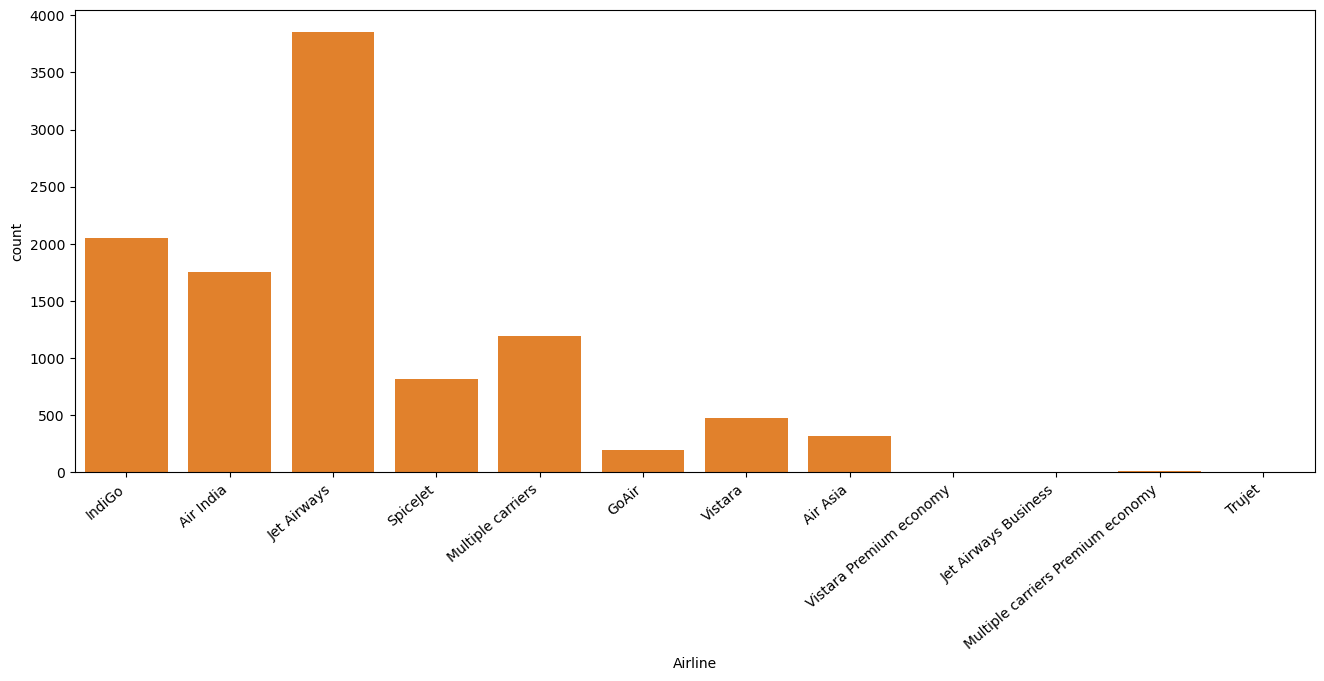

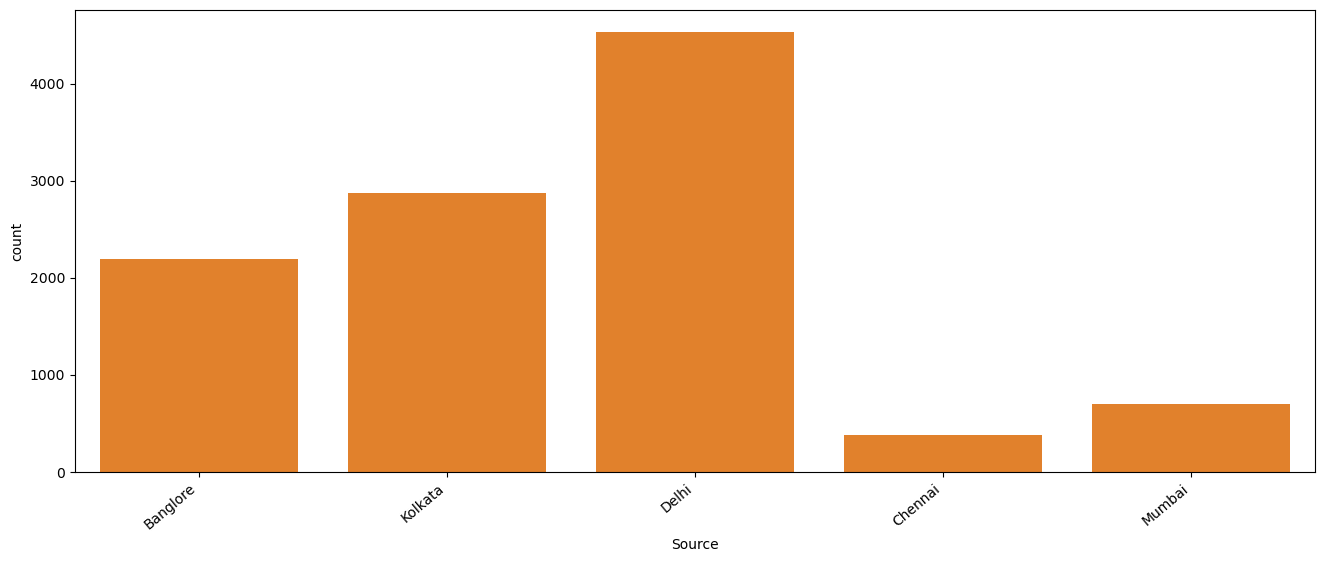

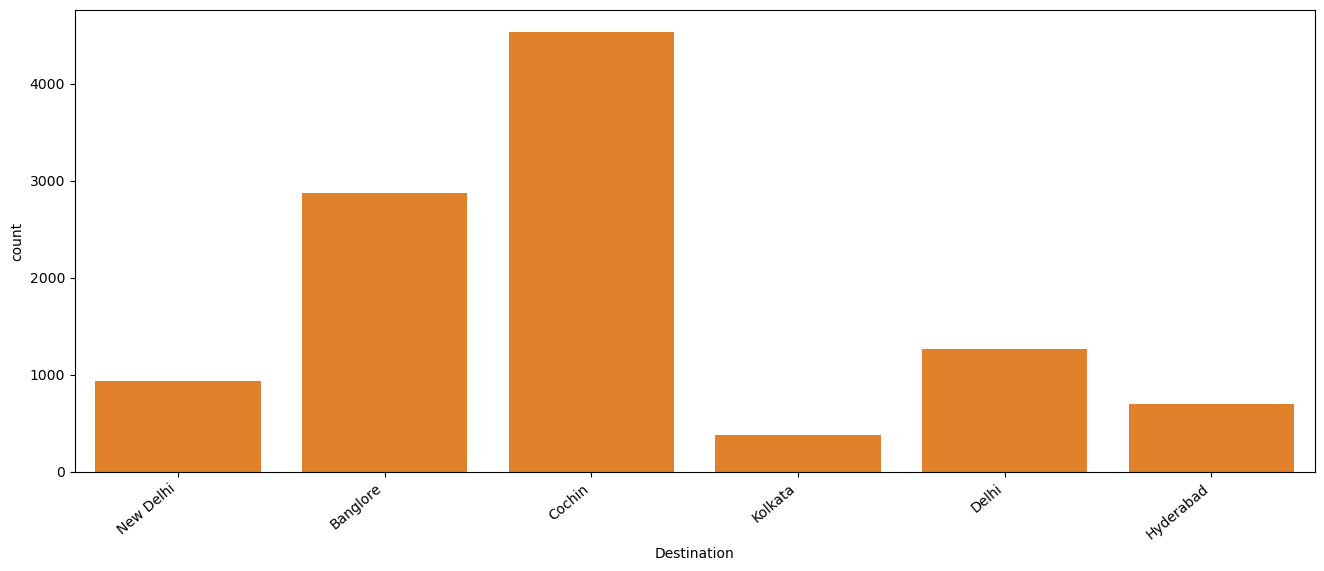

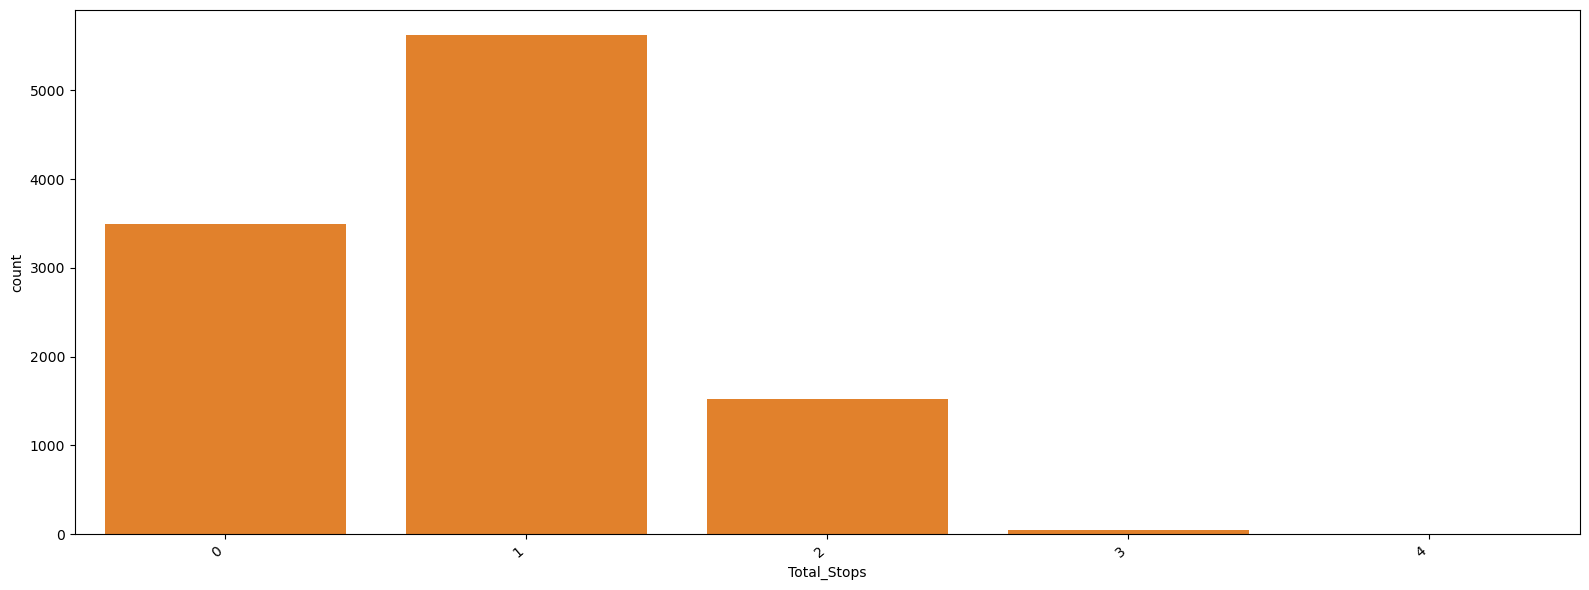

In [26]:
# Price vs Airline, Source, Destination and Total Stops


for i in ['Airline','Source','Destination', 'Total_Stops']:
    plt.figure(figsize=(16,6))
    sns.countplot(data= df, x=i)
    ax = sns.countplot(x = i, data = df.sort_values('Price', ascending = True))
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
    
plt.tight_layout()
plt.show()


In [27]:
# Airline
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

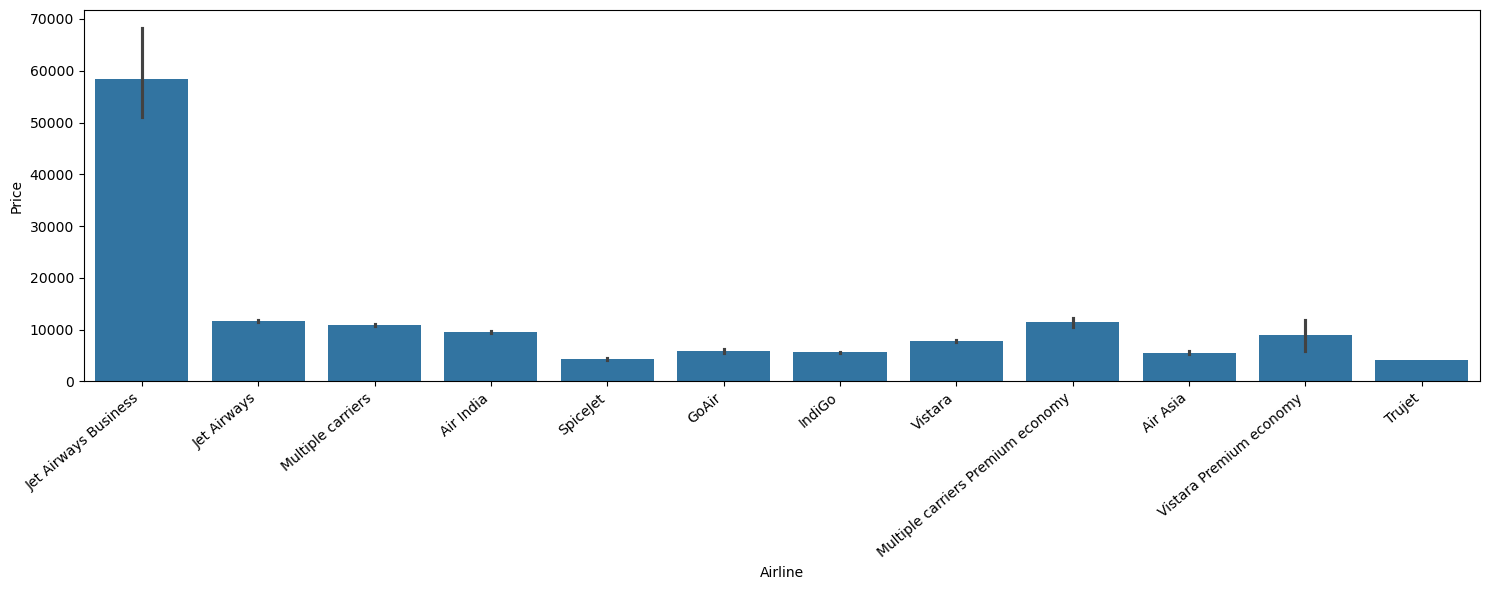

In [28]:
# Price vs  Airline

plt.figure(figsize=(15,6))
ax = sns.barplot(x = 'Airline', y = 'Price', data = df.sort_values('Price', ascending = False))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')

plt.tight_layout()
plt.show()
                
                 

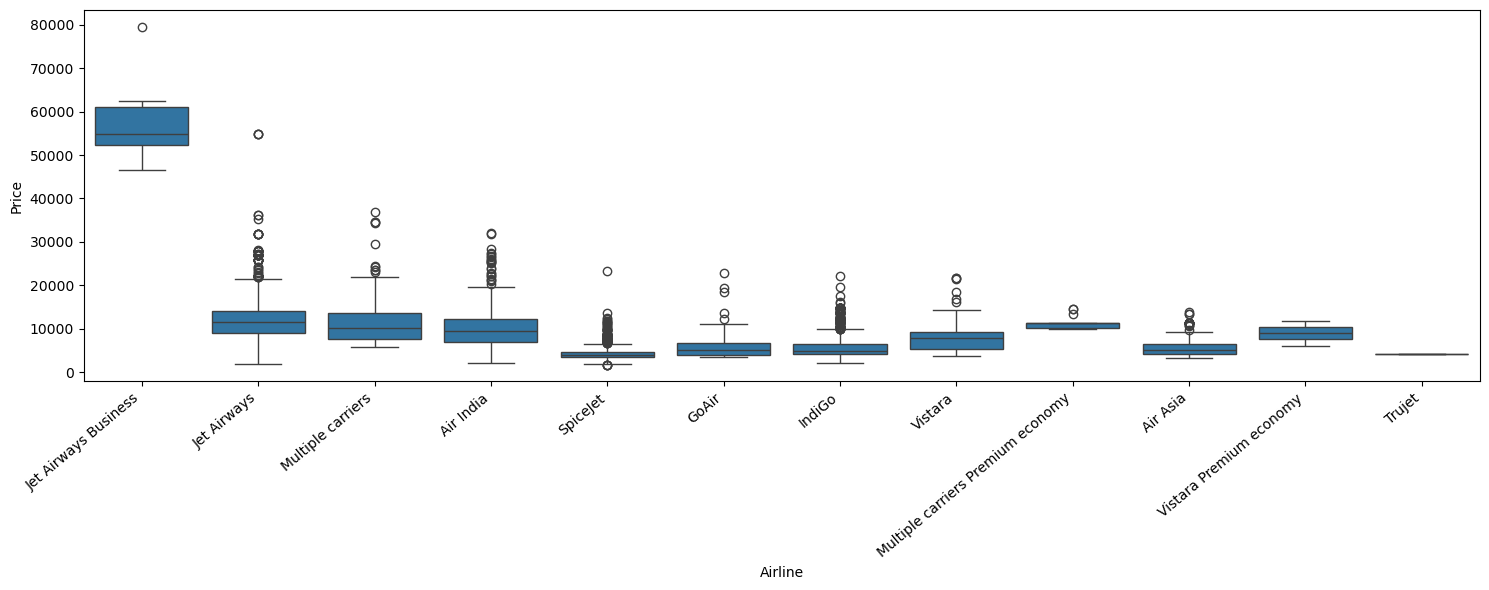

In [29]:
plt.figure(figsize=(15,6))
ax = sns.boxplot(x = 'Airline', y = 'Price', data = df.sort_values('Price', ascending = False))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')

plt.tight_layout()
plt.show()

In [30]:
# Airline, Source & Destination - OHE Trnasformation by pd.get_dummies function

ohe_features = ['Airline', 'Source','Destination']
df = pd.get_dummies(df, columns = ohe_features, drop_first = True)

df.head()

,Route,Duration,Total_Stops,Price,Dep_Hours,Dep_minutes,Arrival_Hours,Arrival_Minute,Day_Journey,Month_Journey,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,170,0,3897,22,20,1,10,24,3,...,False,False,False,False,False,False,False,False,False,True
1,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,1,5,...,False,False,False,True,False,False,False,False,False,False
2,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,9,6,...,False,False,True,False,False,True,False,False,False,False
3,CCU → NAG → BLR,325,1,6218,18,5,23,30,12,5,...,False,False,False,True,False,False,False,False,False,False
4,BLR → NAG → DEL,285,1,13302,16,50,21,35,1,3,...,False,False,False,False,False,False,False,False,False,True


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Route                                      10682 non-null  object
 1   Duration                                   10682 non-null  int64 
 2   Total_Stops                                10682 non-null  int64 
 3   Price                                      10682 non-null  int64 
 4   Dep_Hours                                  10682 non-null  int32 
 5   Dep_minutes                                10682 non-null  int32 
 6   Arrival_Hours                              10682 non-null  int32 
 7   Arrival_Minute                             10682 non-null  int32 
 8   Day_Journey                                10682 non-null  int32 
 9   Month_Journey                              10682 non-null  int32 
 10  Airline_Air India                      

In [32]:
# Route

df.drop(['Route'], axis =1, inplace= True)
# We simply neglect this feature. Let us chck the accuracy and alter if this feature requires

# Model Building

In [33]:
# Need to push Price feature to the end of the columns

temp_col = df.columns.to_list()
print(temp_col, '\n')

new_col = temp_col[:2]+temp_col[3:]

new_col.append(temp_col[2])
print(new_col, '\n')

df = df.reindex(columns = new_col)
df.head()

['Duration', 'Total_Stops', 'Price', 'Dep_Hours', 'Dep_minutes', 'Arrival_Hours', 'Arrival_Minute', 'Day_Journey', 'Month_Journey', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers', 'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi'] 

['Duration', 'Total_Stops', 'Dep_Hours', 'Dep_minutes', 'Arrival_Hours', 'Arrival_Minute', 'Day_Journey', 'Month_Journey', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers', 'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy', 'Sou

,Duration,Total_Stops,Dep_Hours,Dep_minutes,Arrival_Hours,Arrival_Minute,Day_Journey,Month_Journey,Airline_Air India,Airline_GoAir,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price
0,170,0,22,20,1,10,24,3,False,False,...,False,False,False,False,False,False,False,False,True,3897
1,445,2,5,50,13,15,1,5,True,False,...,False,False,True,False,False,False,False,False,False,7662
2,1140,2,9,25,4,25,9,6,False,False,...,False,True,False,False,True,False,False,False,False,13882
3,325,1,18,5,23,30,12,5,False,False,...,False,False,True,False,False,False,False,False,False,6218
4,285,1,16,50,21,35,1,3,False,False,...,False,False,False,False,False,False,False,False,True,13302


In [34]:
from sklearn.model_selection import train_test_split as tts
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [35]:
X_train, X_test, y_train, y_test = tts(X,y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8545, 28)
(2137, 28)
(8545,)
(2137,)


In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [37]:
# Evaluation Metrics

from sklearn.metrics import r2_score as r2, mean_squared_error as mse, mean_absolute_error as mae


# 1. Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred_lr = lr.predict(X_test)

R2_lr = r2(y_test, y_pred_lr)
RMSE_lr = np.sqrt(mse(y_test, y_pred_lr))
MAE_lr = mae(y_test, y_pred_lr)



# 2. Random Forest Regresson

In [40]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 500, min_samples_split = 3)

rf.fit(X_train,y_train)


RandomForestRegressor(min_samples_split=3, n_estimators=500)

In [41]:
y_pred_rf = rf.predict(X_test)

In [42]:
R2_rf = r2(y_test, y_pred_rf)
RMSE_rf = np.sqrt(mse(y_test, y_pred_rf))
MAE_rf = mae(y_test, y_pred_rf)

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define model
rf = RandomForestRegressor()

# Define parameter grid
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Randomized Search
rf_grid = RandomizedSearchCV(rf, rf_params, cv=5, scoring='r2', n_iter=10, n_jobs=-1, random_state=42)
rf_grid.fit(X_train, y_train)

# Best parameters
print("Best RF Parameters:", rf_grid.best_params_)


Best RF Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 30}


In [44]:
y_pred_rf_hyp = rf_grid.best_estimator_.predict(X_test)

In [45]:
R2_rf_hyp = r2(y_test, y_pred_rf_hyp)
RMSE_rf_hyp = np.sqrt(mse(y_test, y_pred_rf_hyp))
MAE_rf_hyp = mae(y_test, y_pred_rf_hyp)

# 3. Gradient Boosting 

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [47]:
y_pred_gbr = gbr.predict(X_test)

In [48]:
R2_gbr = r2(y_test, y_pred_gbr)
RMSE_gbr = np.sqrt(mse(y_test, y_pred_gbr))
MAE_gbr = mae(y_test, y_pred_gbr)

In [49]:
 
from sklearn.model_selection import GridSearchCV  #for hypertuning
gbr = GradientBoostingRegressor(random_state=42)

param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 10]
}

gbr_grid = GridSearchCV(gbr, param_grid_gbr, cv=3, scoring='r2', n_jobs=-1)
gbr_grid.fit(X_train, y_train)

print("Best GBR Parameters:", gbr_grid.best_params_)

# Predictions
y_pred_gbr_hyp = gbr_grid.best_estimator_.predict(X_test)


Best GBR Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


In [50]:
R2_gbr_hyp = r2(y_test, y_pred_gbr_hyp)
RMSE_gbr_hyp = np.sqrt(mse(y_test, y_pred_gbr_hyp))
MAE_gbr_hyp = mae(y_test, y_pred_gbr_hyp)

# 4. XGB Regressor

In [51]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state = 42)

xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [52]:
y_pred_xgb = xgb.predict(X_test)

In [53]:
R2_xgb = r2(y_test, y_pred_xgb)
RMSE_xgb = np.sqrt(mse(y_test, y_pred_xgb))
MAE_xgb = mae(y_test, y_pred_xgb)

In [54]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBRegressor(random_state=42)

param_dist_xgb = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 10],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb_random = RandomizedSearchCV(xgb, param_dist_xgb, cv=3, scoring='r2', n_jobs=-1, n_iter=10)
xgb_random.fit(X_train, y_train)

print("Best XGB Parameters:", xgb_random.best_params_)

# Predictions
y_pred_xgb_hyp = xgb_random.best_estimator_.predict(X_test)

Best XGB Parameters: {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.7}


In [55]:
R2_xgb_hyp = r2(y_test, y_pred_xgb_hyp)
RMSE_xgb_hyp = np.sqrt(mse(y_test, y_pred_xgb_hyp))
MAE_xgb_hyp = mae(y_test, y_pred_xgb_hyp)

# 5. MLP Regressor : ANN

In [56]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor()

mlp.fit(X_train, y_train)


MLPRegressor()

In [57]:
y_pred_mlp = mlp.predict(X_test)

In [58]:
R2_mlp = r2(y_test, y_pred_mlp)
RMSE_mlp = np.sqrt(mse(y_test, y_pred_mlp))
MAE_mlp = mae(y_test, y_pred_mlp)

In [59]:
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50,50), (100,100)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

mlp_grid = GridSearchCV(mlp, param_grid_mlp, cv=3, scoring='r2', n_jobs=-1)
mlp_grid.fit(X_train, y_train)

print("Best MLP Parameters:", mlp_grid.best_params_)

# Predictions
y_pred_mlp_hyp = mlp_grid.best_estimator_.predict(X_test)

Best MLP Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant'}


In [60]:
R2_mlp_hyp = r2(y_test, y_pred_mlp_hyp)
RMSE_mlp_hyp = np.sqrt(mse(y_test, y_pred_mlp_hyp))
MAE_mlp_hyp = mae(y_test, y_pred_mlp_hyp)

# 6. KNN Regressor

In [61]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

knn.fit(X_train, y_train)

KNeighborsRegressor()

In [62]:
y_pred_knn = knn.predict(X_test)

In [63]:
R2_knn = r2(y_test, y_pred_knn)
RMSE_knn = np.sqrt(mse(y_test, y_pred_knn))
MAE_knn = mae(y_test, y_pred_knn)

In [64]:
# Hypertuning for KNN Regressor


param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(knn, param_grid_knn, cv=3, scoring='r2', n_jobs=-1)
knn_grid.fit(X_train, y_train)

print("Best KNN Parameters:", knn_grid.best_params_)

# Predictions
y_pred_knn_hyp = knn_grid.best_estimator_.predict(X_test)

Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}


In [65]:
R2_knn_hyp = r2(y_test, y_pred_knn_hyp)
RMSE_knn_hyp = np.sqrt(mse(y_test, y_pred_knn_hyp))
MAE_knn_hyp = mae(y_test, y_pred_knn_hyp)

# 7. DesicionTree Regressor

In [66]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [67]:
y_pred_dt = dt.predict(X_test)

In [68]:
R2_dt = r2(y_test, y_pred_dt)
RMSE_dt = np.sqrt(mse(y_test, y_pred_dt))
MAE_dt = mae(y_test, y_pred_dt)

In [69]:
# Hypertuning for DecisionTree Regressor


param_grid_dt = {
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

dt_grid = GridSearchCV(dt, param_grid_dt, cv=3, scoring='r2', n_jobs=-1)
dt_grid.fit(X_train, y_train)

print("Best DT Parameters:", dt_grid.best_params_)

# Predictions
y_pred_dt_hyp = dt_grid.best_estimator_.predict(X_test)

Best DT Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [70]:
R2_dt_hyp = r2(y_test, y_pred_dt_hyp)
RMSE_dt_hyp = np.sqrt(mse(y_test, y_pred_dt_hyp))
MAE_dt_hyp = mae(y_test, y_pred_dt_hyp)

In [71]:
Result = pd.DataFrame({
    'Model': ['Linear Regression','Gradient Boosting','Random Forest','XG Boost','Decision Tree','KNN','MLP'],
    'R2_score' :[R2_lr, R2_gbr,R2_rf,R2_xgb,R2_dt,R2_knn, R2_mlp],
    'R2_score_hyp' :['NA',R2_gbr_hyp,R2_rf_hyp,R2_xgb_hyp,R2_dt_hyp,R2_knn_hyp, R2_mlp_hyp],
    'RMSE' : [RMSE_lr, RMSE_gbr,RMSE_rf,RMSE_xgb,RMSE_dt,RMSE_knn, RMSE_mlp],
    'RMSE_hyp' : ['NA', RMSE_gbr_hyp,RMSE_rf_hyp,RMSE_xgb_hyp,RMSE_dt_hyp,RMSE_knn_hyp, RMSE_mlp_hyp],
    'MAE' : [MAE_lr, MAE_gbr,MAE_rf,MAE_xgb,MAE_dt,MAE_knn, MAE_mlp],
    'MAE_hyp' : ['NA',MAE_gbr_hyp,MAE_rf_hyp,MAE_xgb_hyp,MAE_dt_hyp,MAE_knn_hyp, MAE_mlp_hyp]

})

Result
    

,Model,R2_score,R2_score_hyp,RMSE,RMSE_hyp,MAE,MAE_hyp
0,Linear Regression,0.618985,NA,2866.262599,NA,1971.776629,NA
1,Gradient Boosting,0.787729,0.845112,2139.390921,1827.485053,1520.591939,1215.501318
2,Random Forest,0.817268,0.831167,1984.964565,1907.982276,1170.143936,1149.470532
3,XG Boost,0.418383,0.377815,3541.308656,3662.72972,2414.871338,2614.20459
4,Decision Tree,0.735891,0.762047,2386.365459,2265.11707,1333.003595,1236.266029
5,KNN,0.795719,0.802716,2098.742411,2062.487828,1360.154328,1319.554248
6,MLP,0.578224,0.755337,3015.684665,2296.832963,2182.433386,1601.100146


# Evaluating the models with K-Fold Cross-Validation

In [73]:
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation for R2 score
cv_scores_gbr = cross_val_score(gbr, X, y, cv=10, scoring='r2')
cv_scores_rf = cross_val_score(rf, X, y, cv=10, scoring='r2')

print(f"Gradient Boosting R² Score (CV): {cv_scores_gbr.mean():.4f} ± {cv_scores_gbr.std():.4f}")
print(f"Random Forest R² Score (CV): {cv_scores_rf.mean():.4f} ± {cv_scores_rf.std():.4f}")


Gradient Boosting R² Score (CV): 0.7716 ± 0.0176
Random Forest R² Score (CV): 0.8160 ± 0.0216


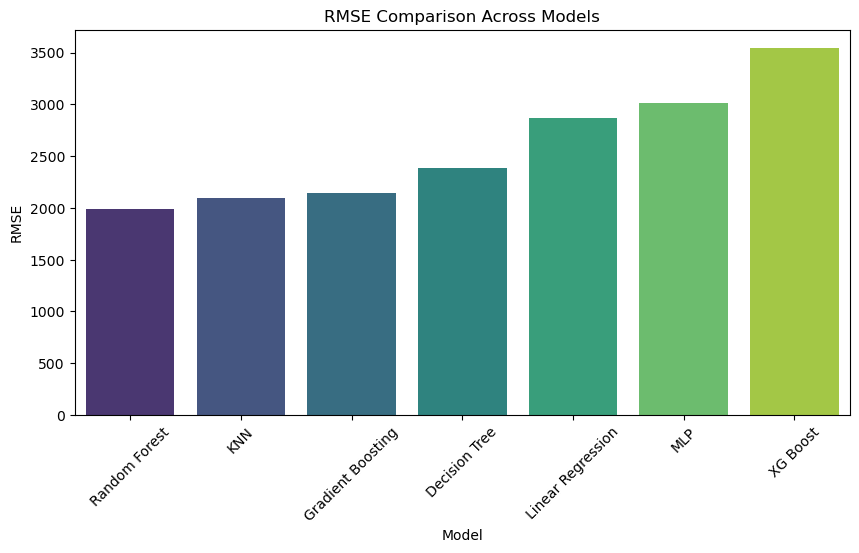

In [76]:
import pandas as pd

# Data from your result table
models = ["Linear Regression", "Gradient Boosting", "Random Forest", "XG Boost", "Decision Tree", "KNN", "MLP"]
rmse_values = [2866.26, 2139.39, 1984.96, 3541.31, 2386.36, 2098.74, 3015.68]
mae_values = [1971.77, 1520.59, 1170.14, 2414.87, 1333.00, 1360.15, 2182.43]

# Convert to DataFrame
df = pd.DataFrame({"Model": models, "RMSE": rmse_values, "MAE": mae_values})

# Sort by RMSE
df = df.sort_values(by="RMSE")

# Plot comparison
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="RMSE", data=df, palette="viridis")
plt.xticks(rotation=45)
plt.title("RMSE Comparison Across Models")
plt.show()


### From the result

1. Random Forest Regressor has highest R2, lower variance (std deviation of 0.0216), it is the most stable model.
2. Random Forest Regressor and Gradient Boosting Regressor shows lowest RMSE value than other models shocasing these two are most performing models among all the models.

# Key Findings

Price of the flight is influenced by the following 
1. Booking time, airline, number of stops, and departure time.
2. Brand value of the airlines.
3. Number of stops between the source and destination.

# Model Performance

1. Random Forest performed the best with an R² score of 0.8160 and the lowest RMSE, making it the most accurate model for predicting flight prices.
2. Gradient Boosting was the second-best model with an R² score of 0.7716.
3. XGBoost and MLP performed the worst, indicating they are not suitable for this dataset.

# Business Impact

1. For Airlines:

Helps airlines set competitive pricing based on market trends.
Can optimize revenue management strategies by predicting peak demand periods.

2. For Customers:

Travelers can predict future flight fares, helping them book at the best price.
Can assist in planning trips in advance to avoid last-minute high fares.